Guide to adding layers

In [1]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(256, 256,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))
print(model.summary())

NameError: name 'keras' is not defined

In [2]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU

In [3]:
BASE_DIR = 'Chosen class balanced/'
names = ["Cardboard boxes","Cardboard drinks","glass","Metal cans","Metal foils and container","paper","Plastic bottles"]

tf.random.set_seed(1)

In [4]:
# Reorganize the folder structure:
if not os.path.isdir(BASE_DIR + 'train/'):
    for name in names:
        os.makedirs(BASE_DIR + 'train/' + name)
        os.makedirs(BASE_DIR + 'val/' + name)
        os.makedirs(BASE_DIR + 'test/' + name)

In [5]:
# Moce the image files
orig_folders = ["Cardboard boxes/","Cardboard drinks/","glass/","Metal cans/","Metal foils and container/","paper/","Plastic bottles/"]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5) #set 60% for training
    n_valid = int((number_of_images*0.25) + 0.5) #set 25% for validation
    n_test = number_of_images - n_train - n_valid #set 15% for test
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train/" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name, BASE_DIR + "val/" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "test/" + names[folder_idx])

1938 1163 485 290
3737 2242 934 561
1986 1192 497 297
2092 1255 523 314
2302 1381 576 345
834 500 209 125
985 591 246 148


In [4]:
# get the preprocessing function of this model
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

In [5]:
# Generate batches of tensor image data with real-time data augmentation.

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    'Chosen class balanced/train',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'Chosen class balanced/val',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'Chosen class balanced/test',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=1,
    shuffle=False,
    color_mode="rgb",
    classes=names
)


Found 2100 images belonging to 7 classes.
Found 875 images belonging to 7 classes.
Found 525 images belonging to 7 classes.


In [35]:
mobileNetv1_model = tf.keras.applications.MobileNetV3Small()
print(type(mobileNetv1_model))
mobileNetv1_model.summary()

# try out different ones, e.g. MobileNetV2
#tl_model = tf.keras.applications.MobileNetV2()
#print(type(tl_model))
#tl_model.summary()

<class 'keras.src.engine.functional.Functional'>
Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, None, None, 3)        0         ['input_4[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling_3[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)                        

                                                                                                  
 expanded_conv_1/depthwise/  (None, None, None, 72)       288       ['expanded_conv_1/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_103 (ReLU)            (None, None, None, 72)       0         ['expanded_conv_1/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_conv_1/project (C  (None, None, None, 24)       1728      ['re_lu_103[0][0]']           
 onv2D)                                                                                           
          

                                                                                                  
 multiply_59 (Multiply)      (None, None, None, 96)       0         ['expanded_conv_3/depthwise/Ba
                                                                    tchNorm[0][0]',               
                                                                     'tf.math.multiply_87[0][0]'] 
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 96)             0         ['multiply_59[0][0]']         
 cite/AvgPool (GlobalAverag                                                                       
 ePooling2D)                                                                                      
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 24)             2328      ['expanded_conv_3/squeeze_exci
 cite/Conv

                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_4/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.math.add_91 (TFOpLambda  (None, 1, 1, 240)            0         ['expanded_conv_4/squeeze_exci
 )                                                                  te/Conv_1[0][0]']             
                                                                                                  
 re_lu_111 (ReLU)            (None, 1, 1, 240)            0         ['tf.math.add_91[0][0]']      
                                                                                                  
 tf.math.multiply_91 (TFOpL  (None, 1, 1, 240)            0         ['re_lu_111[0][0]']           
 ambda)   

 tf.math.multiply_94 (TFOpL  (None, 1, 1, 240)            0         ['re_lu_114[0][0]']           
 ambda)                                                                                           
                                                                                                  
 expanded_conv_5/squeeze_ex  (None, None, None, 240)      0         ['multiply_63[0][0]',         
 cite/Mul (Multiply)                                                 'tf.math.multiply_94[0][0]'] 
                                                                                                  
 expanded_conv_5/project (C  (None, None, None, 40)       9600      ['expanded_conv_5/squeeze_exci
 onv2D)                                                             te/Mul[0][0]']                
                                                                                                  
 expanded_conv_5/project/Ba  (None, None, None, 40)       160       ['expanded_conv_5/project[0][0
 tchNorm (

 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_7/expand (Co  (None, None, None, 144)      6912      ['expanded_conv_6/project/Batc
 nv2D)                                                              hNorm[0][0]']                 
                                                                                                  
 expanded_conv_7/expand/Bat  (None, None, None, 144)      576       ['expanded_conv_7/expand[0][0]
 chNorm (BatchNormalization                                         ']                            
 )                                                                                                
                                                                                                  
 tf.math.a

                                                                                                  
 tf.math.add_101 (TFOpLambd  (None, None, None, 288)      0         ['expanded_conv_8/expand/Batch
 a)                                                                 Norm[0][0]']                  
                                                                                                  
 re_lu_121 (ReLU)            (None, None, None, 288)      0         ['tf.math.add_101[0][0]']     
                                                                                                  
 tf.math.multiply_101 (TFOp  (None, None, None, 288)      0         ['re_lu_121[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_68 (Multiply)      (None, None, None, 288)      0         ['expanded_conv_8/expand/Batch
          

                                                                     'tf.math.multiply_104[0][0]']
                                                                                                  
 expanded_conv_9/depthwise   (None, None, None, 576)      14400     ['multiply_70[0][0]']         
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_9/depthwise/  (None, None, None, 576)      2304      ['expanded_conv_9/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 tf.math.add_105 (TFOpLambd  (None, None, None, 576)      0         ['expanded_conv_9/depthwise/Ba
 a)       

 tf.math.add_108 (TFOpLambd  (None, None, None, 576)      0         ['expanded_conv_10/depthwise/B
 a)                                                                 atchNorm[0][0]']              
                                                                                                  
 re_lu_128 (ReLU)            (None, None, None, 576)      0         ['tf.math.add_108[0][0]']     
                                                                                                  
 tf.math.multiply_108 (TFOp  (None, None, None, 576)      0         ['re_lu_128[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_73 (Multiply)      (None, None, None, 576)      0         ['expanded_conv_10/depthwise/B
                                                                    atchNorm[0][0]',              
          

                                                                                                  
 flatten_3 (Flatten)         (None, 1000)                 0         ['Logits[0][0]']              
                                                                                                  
 Predictions (Activation)    (None, 1000)                 0         ['flatten_3[0][0]']           
                                                                                                  
Total params: 2554968 (9.75 MB)
Trainable params: 2542856 (9.70 MB)
Non-trainable params: 12112 (47.31 KB)
__________________________________________________________________________________________________


In [36]:
#functionl API
#for nonlinear netwroks
base_model = tf.keras.applications.MobileNetV3Small()
x = base_model.layers[-1].output
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(30,activation='relu')(x)
x=layers.Dense(30,activation='relu')(x)
new_outputs = keras.layers.Dense(7)(x)

new_model = keras.Model(inputs=base_model.inputs, outputs=new_outputs)

In [37]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, None, None, 3)        0         ['input_5[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling_4[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)                                                                                  

 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_136 (ReLU)            (None, None, None, 72)       0         ['expanded_conv_1/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_conv_1/project (C  (None, None, None, 24)       1728      ['re_lu_136[0][0]']           
 onv2D)                                                                                           
                                                                                                  
 expanded_conv_1/project/Ba  (None, None, None, 24)       96        ['expanded_conv_1/project[0][0
 tchNorm (

                                                                    tchNorm[0][0]',               
                                                                     'tf.math.multiply_115[0][0]']
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 96)             0         ['multiply_78[0][0]']         
 cite/AvgPool (GlobalAverag                                                                       
 ePooling2D)                                                                                      
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 24)             2328      ['expanded_conv_3/squeeze_exci
 cite/Conv (Conv2D)                                                 te/AvgPool[0][0]']            
                                                                                                  
 expanded_

 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.math.add_119 (TFOpLambd  (None, 1, 1, 240)            0         ['expanded_conv_4/squeeze_exci
 a)                                                                 te/Conv_1[0][0]']             
                                                                                                  
 re_lu_144 (ReLU)            (None, 1, 1, 240)            0         ['tf.math.add_119[0][0]']     
                                                                                                  
 tf.math.multiply_119 (TFOp  (None, 1, 1, 240)            0         ['re_lu_144[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 expanded_

                                                                                                  
 expanded_conv_5/squeeze_ex  (None, None, None, 240)      0         ['multiply_82[0][0]',         
 cite/Mul (Multiply)                                                 'tf.math.multiply_122[0][0]']
                                                                                                  
 expanded_conv_5/project (C  (None, None, None, 40)       9600      ['expanded_conv_5/squeeze_exci
 onv2D)                                                             te/Mul[0][0]']                
                                                                                                  
 expanded_conv_5/project/Ba  (None, None, None, 40)       160       ['expanded_conv_5/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
          

                                                                                                  
 expanded_conv_7/expand (Co  (None, None, None, 144)      6912      ['expanded_conv_6/project/Batc
 nv2D)                                                              hNorm[0][0]']                 
                                                                                                  
 expanded_conv_7/expand/Bat  (None, None, None, 144)      576       ['expanded_conv_7/expand[0][0]
 chNorm (BatchNormalization                                         ']                            
 )                                                                                                
                                                                                                  
 tf.math.add_126 (TFOpLambd  (None, None, None, 144)      0         ['expanded_conv_7/expand/Batch
 a)                                                                 Norm[0][0]']                  
          

 a)                                                                 Norm[0][0]']                  
                                                                                                  
 re_lu_154 (ReLU)            (None, None, None, 288)      0         ['tf.math.add_129[0][0]']     
                                                                                                  
 tf.math.multiply_129 (TFOp  (None, None, None, 288)      0         ['re_lu_154[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_87 (Multiply)      (None, None, None, 288)      0         ['expanded_conv_8/expand/Batch
                                                                    Norm[0][0]',                  
                                                                     'tf.math.multiply_129[0][0]']
          

 expanded_conv_9/depthwise   (None, None, None, 576)      14400     ['multiply_89[0][0]']         
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_9/depthwise/  (None, None, None, 576)      2304      ['expanded_conv_9/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 tf.math.add_133 (TFOpLambd  (None, None, None, 576)      0         ['expanded_conv_9/depthwise/Ba
 a)                                                                 tchNorm[0][0]']               
                                                                                                  
 re_lu_158

                                                                                                  
 re_lu_161 (ReLU)            (None, None, None, 576)      0         ['tf.math.add_136[0][0]']     
                                                                                                  
 tf.math.multiply_136 (TFOp  (None, None, None, 576)      0         ['re_lu_161[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_92 (Multiply)      (None, None, None, 576)      0         ['expanded_conv_10/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_136[0][0]']
                                                                                                  
 expanded_

                                                                                                  
 Predictions (Activation)    (None, 1000)                 0         ['flatten_4[0][0]']           
                                                                                                  
 dense_4 (Dense)             (None, 64)                   64064     ['Predictions[0][0]']         
                                                                                                  
 dense_5 (Dense)             (None, 30)                   1950      ['dense_4[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 7)                    217       ['dense_6[0][0]']             
          

In [38]:
# set trainable=False for all layers
# we don't want to train them again
for layer in new_model.layers:
    layer.trainable = False
new_model.layers[-1].trainable=True
new_model.layers[-2].trainable=True
new_model.layers[-3].trainable=True
new_model.layers[-4].trainable=True
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, None, None, 3)        0         ['input_5[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling_4[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)                                                                                  

 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_136 (ReLU)            (None, None, None, 72)       0         ['expanded_conv_1/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_conv_1/project (C  (None, None, None, 24)       1728      ['re_lu_136[0][0]']           
 onv2D)                                                                                           
                                                                                                  
 expanded_conv_1/project/Ba  (None, None, None, 24)       96        ['expanded_conv_1/project[0][0
 tchNorm (

                                                                    tchNorm[0][0]',               
                                                                     'tf.math.multiply_115[0][0]']
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 96)             0         ['multiply_78[0][0]']         
 cite/AvgPool (GlobalAverag                                                                       
 ePooling2D)                                                                                      
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 24)             2328      ['expanded_conv_3/squeeze_exci
 cite/Conv (Conv2D)                                                 te/AvgPool[0][0]']            
                                                                                                  
 expanded_

 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.math.add_119 (TFOpLambd  (None, 1, 1, 240)            0         ['expanded_conv_4/squeeze_exci
 a)                                                                 te/Conv_1[0][0]']             
                                                                                                  
 re_lu_144 (ReLU)            (None, 1, 1, 240)            0         ['tf.math.add_119[0][0]']     
                                                                                                  
 tf.math.multiply_119 (TFOp  (None, 1, 1, 240)            0         ['re_lu_144[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 expanded_

                                                                                                  
 expanded_conv_5/squeeze_ex  (None, None, None, 240)      0         ['multiply_82[0][0]',         
 cite/Mul (Multiply)                                                 'tf.math.multiply_122[0][0]']
                                                                                                  
 expanded_conv_5/project (C  (None, None, None, 40)       9600      ['expanded_conv_5/squeeze_exci
 onv2D)                                                             te/Mul[0][0]']                
                                                                                                  
 expanded_conv_5/project/Ba  (None, None, None, 40)       160       ['expanded_conv_5/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
          

                                                                                                  
 expanded_conv_7/expand (Co  (None, None, None, 144)      6912      ['expanded_conv_6/project/Batc
 nv2D)                                                              hNorm[0][0]']                 
                                                                                                  
 expanded_conv_7/expand/Bat  (None, None, None, 144)      576       ['expanded_conv_7/expand[0][0]
 chNorm (BatchNormalization                                         ']                            
 )                                                                                                
                                                                                                  
 tf.math.add_126 (TFOpLambd  (None, None, None, 144)      0         ['expanded_conv_7/expand/Batch
 a)                                                                 Norm[0][0]']                  
          

 a)                                                                 Norm[0][0]']                  
                                                                                                  
 re_lu_154 (ReLU)            (None, None, None, 288)      0         ['tf.math.add_129[0][0]']     
                                                                                                  
 tf.math.multiply_129 (TFOp  (None, None, None, 288)      0         ['re_lu_154[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_87 (Multiply)      (None, None, None, 288)      0         ['expanded_conv_8/expand/Batch
                                                                    Norm[0][0]',                  
                                                                     'tf.math.multiply_129[0][0]']
          

 expanded_conv_9/depthwise   (None, None, None, 576)      14400     ['multiply_89[0][0]']         
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_9/depthwise/  (None, None, None, 576)      2304      ['expanded_conv_9/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 tf.math.add_133 (TFOpLambd  (None, None, None, 576)      0         ['expanded_conv_9/depthwise/Ba
 a)                                                                 tchNorm[0][0]']               
                                                                                                  
 re_lu_158

                                                                                                  
 re_lu_161 (ReLU)            (None, None, None, 576)      0         ['tf.math.add_136[0][0]']     
                                                                                                  
 tf.math.multiply_136 (TFOp  (None, None, None, 576)      0         ['re_lu_161[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_92 (Multiply)      (None, None, None, 576)      0         ['expanded_conv_10/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_136[0][0]']
                                                                                                  
 expanded_

                                                                                                  
 Predictions (Activation)    (None, 1000)                 0         ['flatten_4[0][0]']           
                                                                                                  
 dense_4 (Dense)             (None, 64)                   64064     ['Predictions[0][0]']         
                                                                                                  
 dense_5 (Dense)             (None, 30)                   1950      ['dense_4[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 7)                    217       ['dense_6[0][0]']             
          

In [39]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

new_model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [40]:
epochs = 30

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=2,
    start_from_epoch=0
)
#tf.keras.callbacks.EarlyStopping(
#    monitor='val_loss',
#    min_delta=0,
#    patience=0,
#    verbose=0,
#    mode='auto',
#    baseline=None,
#    restore_best_weights=False,

new_model.fit(train_batches, validation_data=val_batches,
            callbacks=[early_stopping],
          epochs=epochs, verbose=1)

Epoch 1/30
 77/525 [===>..........................] - ETA: 12s - loss: 1.9315 - accuracy: 0.2727

C:\Users\Amirul\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


525/525 [==============================] - 23s 39ms/step - loss: 1.3195 - accuracy: 0.5529 - val_loss: 0.7054 - val_accuracy: 0.7760
Epoch 2/30
525/525 [==============================] - 20s 38ms/step - loss: 0.7000 - accuracy: 0.7614 - val_loss: 0.6108 - val_accuracy: 0.7794
Epoch 3/30
525/525 [==============================] - 20s 38ms/step - loss: 0.5857 - accuracy: 0.7986 - val_loss: 0.5753 - val_accuracy: 0.8160
Epoch 4/30
525/525 [==============================] - 28s 53ms/step - loss: 0.5061 - accuracy: 0.8214 - val_loss: 0.5492 - val_accuracy: 0.8023
Epoch 5/30
525/525 [==============================] - 23s 43ms/step - loss: 0.4328 - accuracy: 0.8495 - val_loss: 0.5578 - val_accuracy: 0.8297
Epoch 6/30
525/525 [==============================] - 22s 42ms/step - loss: 0.3955 - accuracy: 0.8571 - val_loss: 0.5604 - val_accuracy: 0.8514
Epoch 7/30
525/525 [==============================] - 21s 39ms/step - loss: 0.3997 - accuracy: 0.8590 - val_loss: 0.5429 - val_accuracy: 0.8514
Epo

In [41]:
new_model.evaluate(test_batches, verbose=1)

525/525 [==============================] - 6s 11ms/step - loss: 0.5495 - accuracy: 0.8419


[0.5494892597198486, 0.8419047594070435]

In [42]:
new_model.save("MobileNetV3_64relu_30relu_30relu_7L_BD500.keras") #saving trained model

In [43]:
loadmodel=tf.keras.models.load_model("MobileNetV3_64relu_30relu_30relu_7L_BD500.keras")

In [44]:
# make some predictions
predictions = loadmodel.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

525/525 [==============================] - 6s 10ms/step


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
import seaborn as sns

Classes = ["Cardboard boxes","Cardboard drinks","glass","Metal cans","Metal foils and container","paper","Plastic bottles"]


def plot2(y_actual,y_true):

    column=[f'Predicted {label}'for label in Classes]
    indices=[f'Actual {label}' for label in Classes]
    table=pd.DataFrame(confusion_matrix(y_actual,y_result),
                       columns=column,index=indices)

    
    return sns.heatmap(table,annot=True,fmt='d',cmap='Blues') 
    
y_actual=test_batches.labels
y_result=labels

<Axes: >

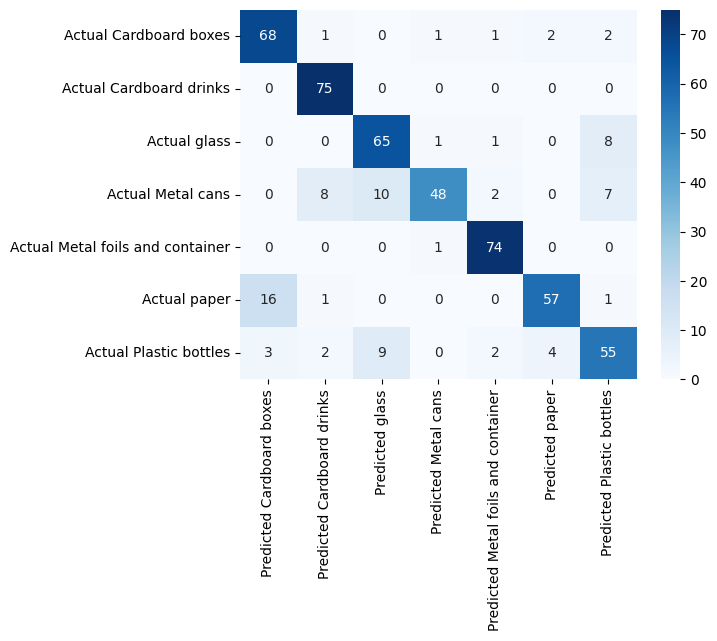

In [46]:
plot2(y_actual,y_result)

In [47]:
#Confusion matrix report

matrix=classification_report(y_actual,y_result)
print('Classification report: \n',matrix)

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        75
           1       0.86      1.00      0.93        75
           2       0.77      0.87      0.82        75
           3       0.94      0.64      0.76        75
           4       0.93      0.99      0.95        75
           5       0.90      0.76      0.83        75
           6       0.75      0.73      0.74        75

    accuracy                           0.84       525
   macro avg       0.85      0.84      0.84       525
weighted avg       0.85      0.84      0.84       525



In [48]:
modelname='MobileNetV3_64relu_30relu_30relu_7L_BD500_summary.txt'
def myprint(s):
    with open(modelname,'a') as f:
        print(s, file=f)

loadmodel.summary(print_fn=myprint)

file2write=open(modelname,'a')
file2write.write(matrix)
file2write.close()

In [49]:
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(y_actual,y_result)

# Labeling the rows and columns
classes = ["0","1","2","3","4","5","6"]
conf_matrix_labeled = np.vstack((np.array([""] + classes), np.column_stack((np.array(classes), conf_matrix))))

# Convert the confusion matrix to a formatted string
conf_matrix_text = "Confusion Matrix:\n" + str(conf_matrix)

# Specify the path of the summary text file
summary_file_path = modelname

# Read the content of the summary file
with open(summary_file_path, 'r') as summary_file:
    summary_content = summary_file.read()
additional_text = "\nClasses :\n Cardboard boxes=0\n Cardboard drinks=1\n glass=2\n Metal cans=3\n Metal foils and container=4\n paper=5\n Plastic bottles=6"
# Append the confusion matrix content to the summary content
combined_content = summary_content + '\n\n' + conf_matrix_text + '\n\n'+additional_text

# Write the combined content back to the summary file
with open(summary_file_path, 'w') as summary_file:
    summary_file.write(combined_content)

print(f"Confusion matrix added to {summary_file_path}")

Confusion matrix added to MobileNetV3_64relu_30relu_30relu_7L_BD500_summary.txt
